In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
df_0 = pd.read_csv("./dataset/KDDTrain+_20Percent.txt")
df= df_0.copy()
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


In [3]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

In [4]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25191.000,305.066,2686.608,0.000,0.000,0.000,0.000,42862.000
src_bytes,25191.000,24331.575,2410853.249,0.000,0.000,44.000,279.000,381709090.000
dst_bytes,25191.000,3491.986,88832.479,0.000,0.000,0.000,530.500,5151385.000
land,25191.000,0.000,0.009,0.000,0.000,0.000,0.000,1.000
wrong_fragment,25191.000,0.024,0.260,0.000,0.000,0.000,0.000,3.000
urgent,25191.000,0.000,0.006,0.000,0.000,0.000,0.000,1.000
hot,25191.000,0.198,2.154,0.000,0.000,0.000,0.000,77.000
num_failed_logins,25191.000,0.001,0.045,0.000,0.000,0.000,0.000,4.000
logged_in,25191.000,0.395,0.489,0.000,0.000,0.000,1.000,1.000
num_compromised,25191.000,0.228,10.418,0.000,0.000,0.000,0.000,884.000


In [6]:
df.shape

(25191, 43)

<Figure size 2000x4000 with 0 Axes>

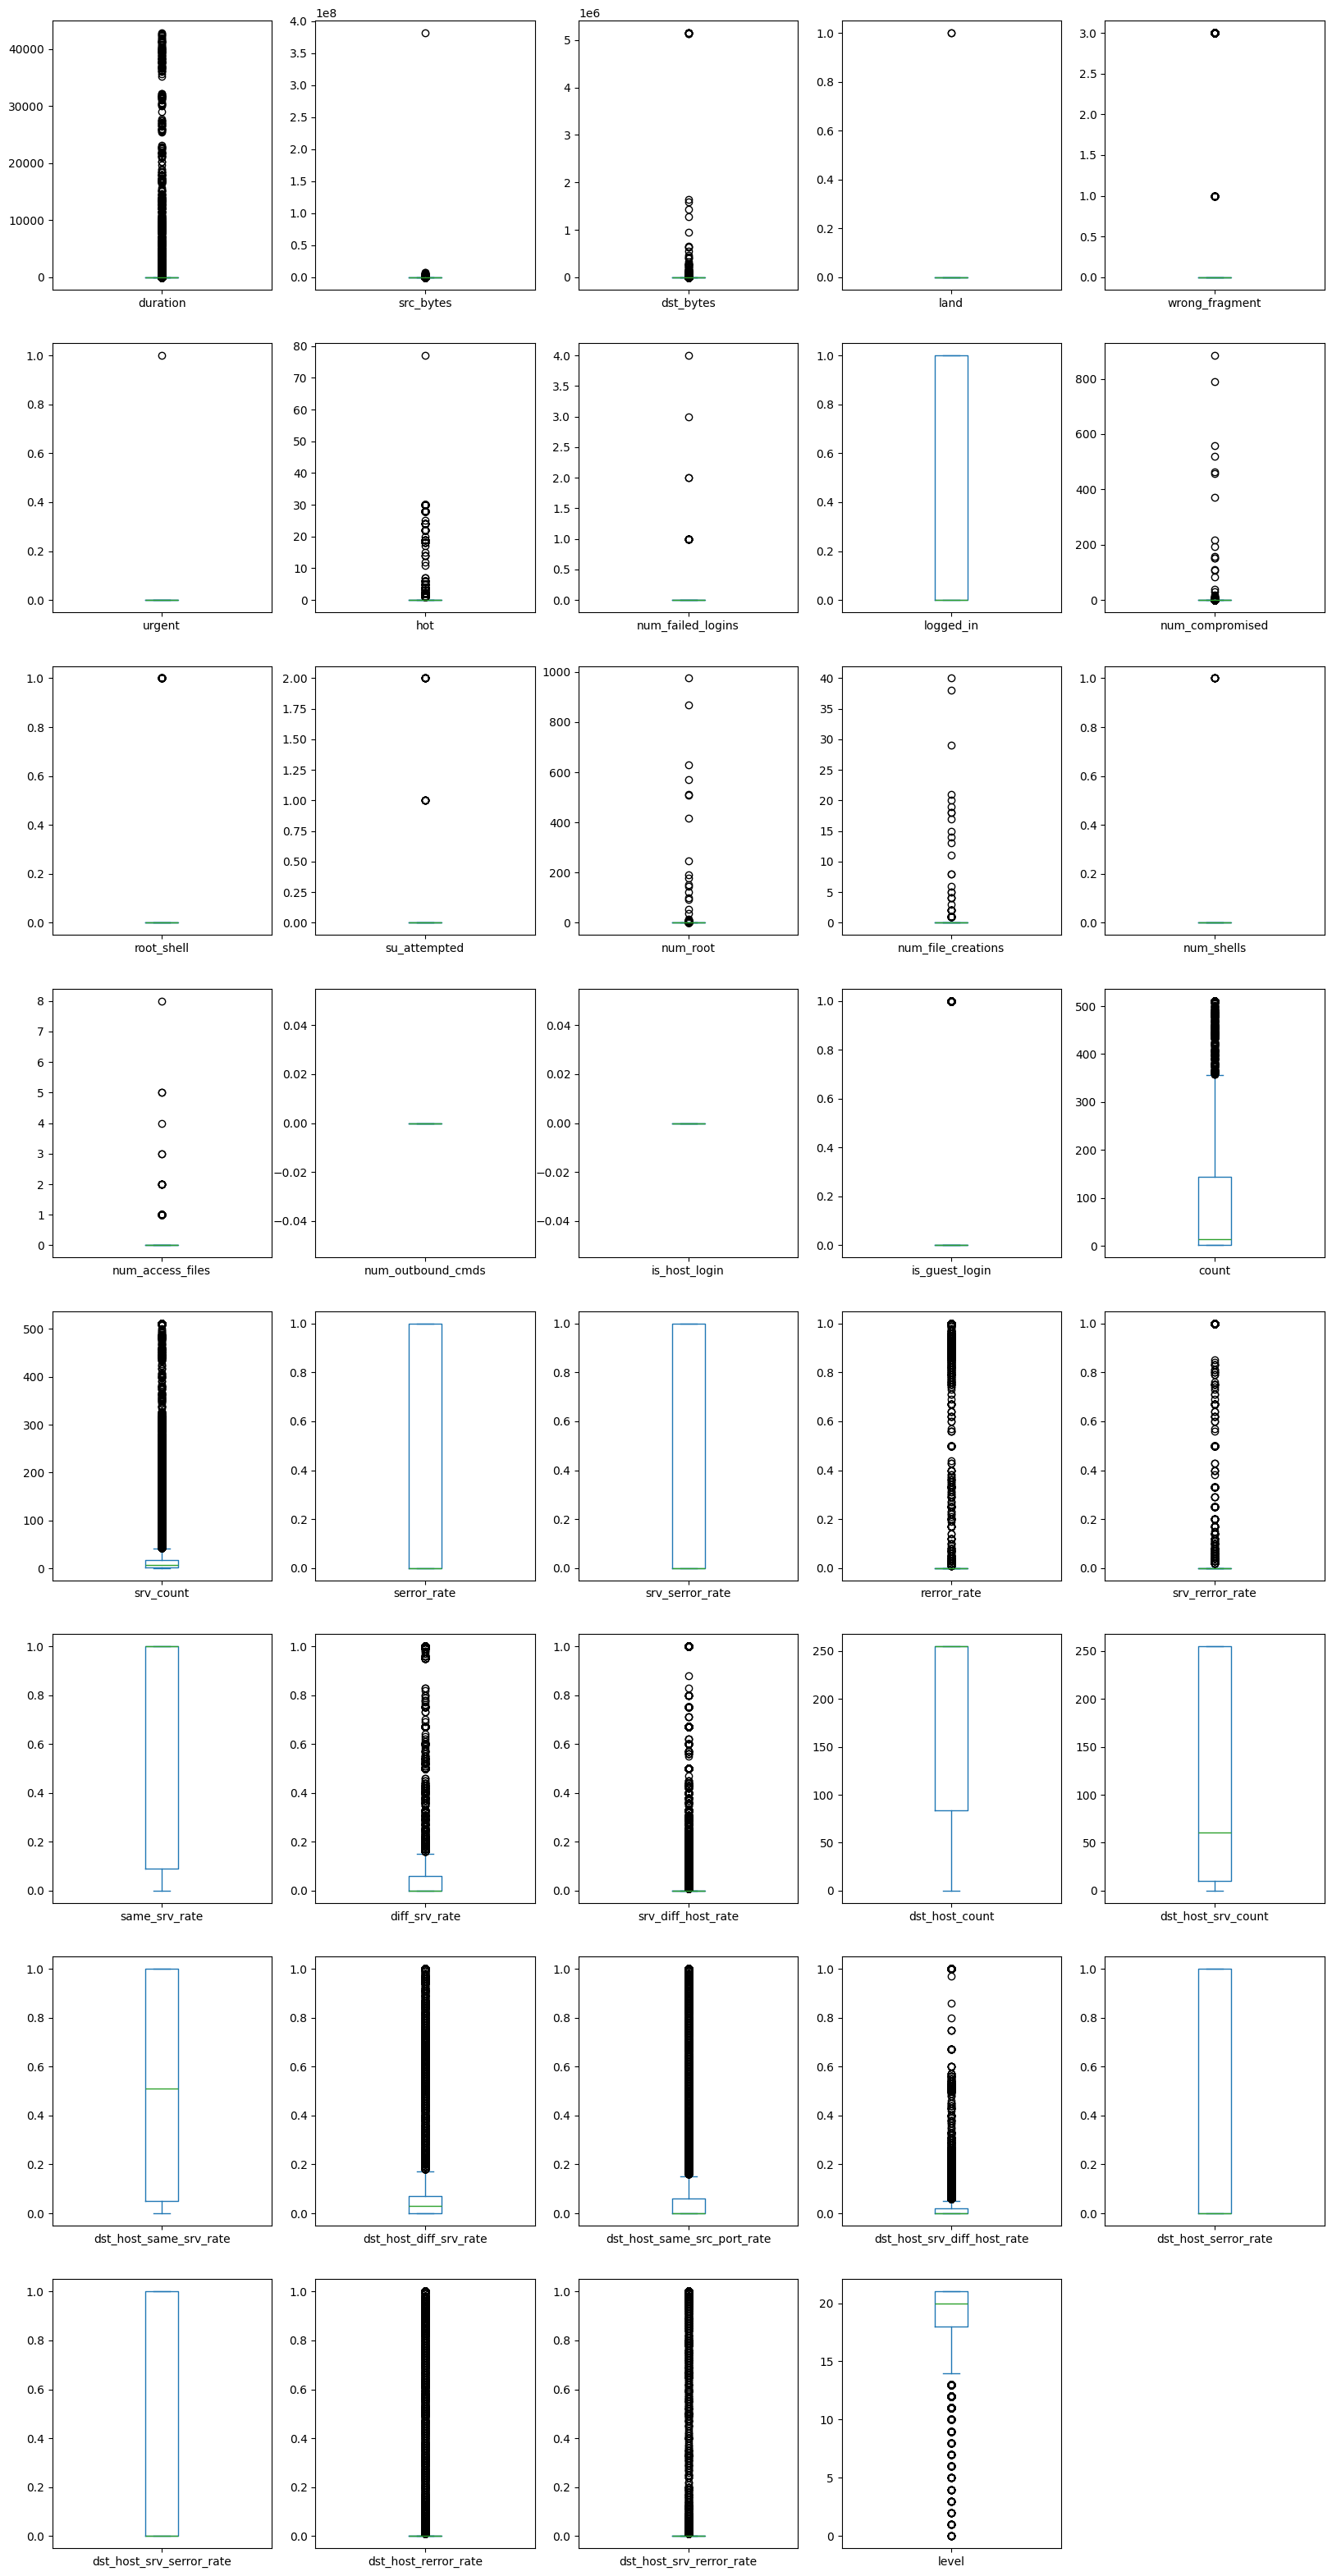

In [7]:
plt.figure(figsize=(20, 40))
df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()